# Basic Sales Summary from a Tiny SQLite Database using Python

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
sample_data = [
    ("Laptop", 5, 55000),
    ("Mouse", 25, 800),
    ("Keyboard", 15, 1500),
    ("Monitor", 8, 12000),
    ("Laptop", 3, 56000),
    ("Mouse", 18, 850)
]


In [5]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [6]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)


In [7]:
print("=== Basic Sales Summary ===")
print(df)

=== Basic Sales Summary ===
    product  total_qty   revenue
0  Keyboard         15   22500.0
1    Laptop          8  443000.0
2   Monitor          8   96000.0
3     Mouse         43   35300.0


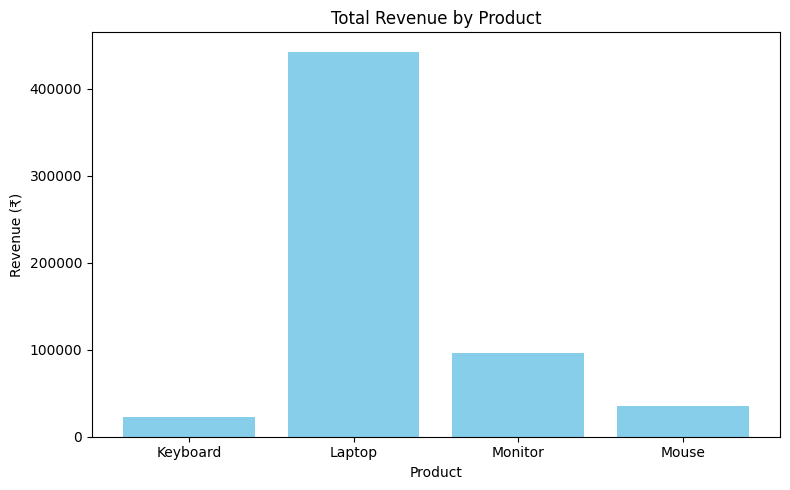

In [8]:
plt.figure(figsize=(8, 5))
plt.bar(df["product"], df["revenue"], color='skyblue')
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()


In [9]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [10]:
conn.close()